# Linear Regression in TensorFlow

Credits: Forked from [TensorFlow-Examples](https://github.com/aymericdamien/TensorFlow-Examples) by Aymeric Damien

## Setup

Refer to the [setup instructions](http://nbviewer.ipython.org/github/donnemartin/data-science-ipython-notebooks/blob/master/deep-learning/tensor-flow-examples/Setup_TensorFlow.md)

In [4]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [5]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [6]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [7]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [8]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [10]:
# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

In [11]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [13]:
# Initializing the variables
init=tf.global_variables_initializer()
#init = tf.initialize_all_variables()

Epoch: 0001 cost= 31.839448929 W= 1.7486006 b= -1.3675199
Epoch: 0051 cost= 0.375694633 W= 0.55504453 b= -1.3959256
Epoch: 0101 cost= 0.341194630 W= 0.5368776 b= -1.2652348
Epoch: 0151 cost= 0.310678035 W= 0.5197915 b= -1.1423173
Epoch: 0201 cost= 0.283685446 W= 0.5037216 b= -1.0267125
Epoch: 0251 cost= 0.259809256 W= 0.48860753 b= -0.91798276
Epoch: 0301 cost= 0.238690019 W= 0.47439235 b= -0.8157198
Epoch: 0351 cost= 0.220009178 W= 0.46102253 b= -0.7195383
Epoch: 0401 cost= 0.203485608 W= 0.44844794 b= -0.62907755
Epoch: 0451 cost= 0.188869864 W= 0.4366211 b= -0.54399604
Epoch: 0501 cost= 0.175942078 W= 0.42549768 b= -0.46397534
Epoch: 0551 cost= 0.164507180 W= 0.4150358 b= -0.38871336
Epoch: 0601 cost= 0.154392913 W= 0.40519625 b= -0.3179278
Epoch: 0651 cost= 0.145446822 W= 0.3959418 b= -0.25135228
Epoch: 0701 cost= 0.137533918 W= 0.38723785 b= -0.18873617
Epoch: 0751 cost= 0.130535007 W= 0.37905148 b= -0.12984408
Epoch: 0801 cost= 0.124344543 W= 0.37135196 b= -0.07445462
Epoch: 0851

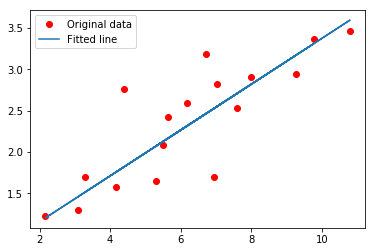

In [14]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [16]:
from IPython.display import Image
Image(filename='lineareg.png')

IOError: [Errno 2] No such file or directory: u'lineareg.png'